# COGS 108 - Final Project

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview
For our project, we used satellite datasets of sea ice extent, surface temperature anomalies, and glacier mass to generate models predicting sea level. We predicted that models including all three of these variables would have higher accuracy than models using combinations of two or less variables. Our results showed that glacier mass was the single most important variable for predicting sea level changes, though models including sea ice changes also had relatively strong predictive power.

# Names

- Isaiah Cortez
- Vanessa Gonzalez
- Justin Le
- Bailey Man
- Andrea Mansilla

# Research Question
How accurately can we predict the rising sea level? Specifically, how well can changes in global sea level be predicted using a combination of sea ice extent data, surface temperature anomaly data, and glacier mass balance data?
# Background & Prior Work

## Introduction

Climate change is one of the most important existential threats facing humanity today; though Earth itself will remain mostly unphased by a 5-degree increase in global temperature, the results could prove catastrophic to humanity’s current way of life. Of the various effects global temperature increases might have worldwide, a notable one is an increase in average sea level. A drastic increase in sea level would wipe out many coastal cities like parts of Tampa or even San Diego itself. Understanding what drives the current trend of sea level rise and taking action based on the data shown would serve as a good starting point to slow or even reverse this trend.

In terms of prior work, researchers like Warrick and Church have written extensively about the factors that contribute to changes in mean sea level, like the melting of glaciers and tectonic activity, so these mechanisms are well understood. However, for our project, we attempted to further our understanding of these factors by building a predictive model. We wanted to see which factors specifically, and to what extent, the data we chose would influence our prediction accuracy. 

Relevant links for prior work:
- https://dspace.library.uu.nl/handle/1874/22121
- https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2005GL024826


## Climate Models
Climate models are a powerful tool for predicting future climate conditions; they are generally used to predict the temperature and precipitation of the Earth's surface.  Generally, climate models are dependent on equations which are constrained by variables like air temperature, pressure, density, water vapor content, and wind magnitude in three directions. These variables are expressions of basic physical principles like conservation of mass, momentum, and energy, as well as the ideal gas law as applied to air. Manipulating and solving these equations allow climate models to act as a proxy for climate change on Earth's surface. These climate models are incredibly complex, and require lots of data and involve heavy mathematical calculation. Additionally, the dataset we used measured global mean sea level instead of regional sea level. So, for the purposes of our analysis, we used a simplified global climate model instead of a regular regional climate model to generate sea level predictions.

Relevant link for further reading on climate models:
- https://climate.mit.edu/explainers/climate-models


# Hypothesis

Our hypothesis for our research question is that a simple model trained on all three of our chosen variables (sea ice extent data, surface temperature anomaly data, and glacier mass balance data), will be more accurate than models trained on two or less of these variables.

We think this will be the outcome because we think that more variables to train on will mean more data for better predictions. However, it's possible that this might not be the case, and that selecting certain variables may lower prediction accuracy.

# Dataset(s)

This project uses the following datasets:
1. [Global Mean Sea Level (1987-Present)](https://datahub.io/core/sea-level-rise#readme)
2. [Global Glacier Mass Balance ()](https://datahub.io/core/glacier-mass#readme)
3. [Global Surface Temperature (1945-2014)](https://datahub.io/core/global-temperature#readme)
4. [Global Sea Ice Extent](https://nsidc.org/data/seaice_index/archives)

### Sea Level Rise
Dataset Name: Global Average Absolute Sea Level Change, 1880-2014
- Link to the dataset: https://datahub.io/core/sea-level-rise#readme
- Number of observations: 134

This dataset includes cumulative changes in sea level from the years of 1880-2014. Average absolute sea level change referring to the height (inches) of the ocean’s surface is being demonstrated in the dataset. We converted the height from inches to meters in the data analysis section, as we noticed this problem while we were doing EDA.

### Surface Temperature Anomalies
Dataset Name: MLOST by NOAA
- Link to the dataset: https://www.ncdc.noaa.gov/cag/global/time-series
- Number of observations: 141

This dataset includes a combination of combined global land dataset and ocean temperature anomalies dataset from the years of 1880-2021. This dataset provides analysis/ranks of monthly and annual temperatures for the globe. More information about this dataset can be found at https://www.ncdc.noaa.gov/cag/global/data-info.

### Global Mass of Glaciers
Dataset Name: Average cumulative mass balance of reference Glaciers worldwide
- Link to the dataset: https://datahub.io/core/glacier-mass-balance#data
- Number of observations: 69

This dataset includes a cumulative change in mass balance of glaciers from the years of 1945-2014. The values shown demonstrate the average of all the glaciers measured that year. Negative values indicated a net loss of ice.

### Sea Level Rise
Dataset Name: Global Sea Ice Change
- Link to the dataset: https://masie_web.apps.nsidc.org/pub//DATASETS/NOAA/G02135/
- Number of observations: 14078

This dataset includes changes in global sea ice. Sea ice is seawater that has frozen. There were many observations for this dataset, so we narrowed it down for the purposes of our project (described later).
 
## Combining the datasets
### Loading in
First, each data set was loaded in, using pd.read_csv():  Sea Level Rise as df_sl, Surface Temperature Analysis as df_st, and Global Mass of Glaciers as df_gm.
 
### Filter columns
Next, each data set was trimmed to only include the relevant columns. Also, new data sets were created while removing unnecessary features: 
- df_st_f contains only the columns ‘year’ and ‘mean_temp’ from df_st, and ‘year’ was renamed to be capitalized to ‘Year’. 
- df_gm_f contains only the columns 'Year', 'Mean cumulative mass balance', 'Number of observations' from df_dm; df_sl was left as is, and is renamed to df_sl_f while filtering by year. 
- Columns from original datasets were removed because the datasets contained many features and observations that were not helpful for our research question. Keeping only the relevant columns makes the data more concise and easier to work through during exploratory data analysis, making visualizations, and creating our models.

### Filter by year
In order to make our data even more concise, we looked at the minimum and maximum years from each data set’s ‘Year’ column and found the highest minimum (1945) and lowest maximum(2013). For each dataset, we filtered the ‘Year’ column to only include observations within this range: 1945-2013.  

### Merge datasets on 'year' column
Lastly, a single dataset df_all was created by merging together df_sl_f, df_st,f, and df_gm_f on the ‘Year’ column. This data set contained only one column of ‘Year’ with one row (observation) for each year of 1945-2013, 68 observations total. This made the data even easier to work with since there is one concise data set with each row containing the relevant features. This way, we can reference a single dataset moving forward.

### Dataset Description / Analysis of Dataset
df_all contains 69 rows, with the first being the titles of the columns: ‘Year’ , ‘CSIRO Adjusted Sea Level’ , ‘Lower Error Bound’, ‘Upper Error Bound’, ‘NOAA Adjusted Sea Level’, and ‘mean_temp’. df_all contains 69 rows, with the first being the titles of the columns: ‘Year’ , ‘CSIRO Adjusted Sea Level’ , ‘Lower Error Bound’, ‘Upper Error Bound’, ‘NOAA Adjusted Sea Level’, and ‘mean_temp’  The two columns for NOAA and CSIRO adjusted sea level include data from two organizations that study sea level: National Oceanic and Atmospheric Administration and Commonwealth Scientific and Industrial Research Organisation respectively. Having information from different sources makes our data more reliable. Including the Low and Upper Error Bound is another measure of reliability, showing that there is variability in the sea level measurements as well as being able to gauge how accurate the average measurements are in respect to this error range. Overall, df_all contains the measurements described in our hypothesis in order to create prediction models of the sea level. 

## Setup

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning
### Data Cleanliness and Usability


The data used in this project comes from the 4 sources below:
- Northern Hemisphere Sea Ice Extent

- Global Mean Sea Level

- Global Surface Temperature

- Global Glacier Mass Balance

Getting the data from these sources into a useable format requires the following steps:
1. Extract data from each file in .txt or .csv format
2. Remove excess or unused columns and rows and load as a pandas dataframe
3. Filter out years before or after the shared years from all datasets
4. Fix column names
5. Merge dataframes on the 'year' column

### Preprocessing
Each of the datasets has already undergone preprocessing, either by us or by the source we obtained it from. The 'shared years' that we use to merge the datasets are in the range 1990-2013, because this was the only time period from which we had data from all datasets.

The Northern Hemisphere Sea Ice Extent dataset includes measurements every other day from 1978 to 1987, and daily measurements from 1987 until the present day. The raw data collected is collected through measurement of the temperature brightness of the Earth's surface. This is parsed through the [NASA Team Algorithm](https://nsidc.org/support/faq/nasa-team-vs-bootstrap-algorithm) to convert the observations to a passive microwave sea ice concentration dataset, with indices as mentioned above. This dataset is then saved as a .csv file.

In [2]:
# filepaths
fp_sl_epa = 'data/sealevel/epa-sea-level.csv'
fp_st = 'data/surfacetemp/surfacetemp1945_2014.csv'
fp_gm = 'https://pkgstore.datahub.io/core/glacier-mass-balance/glaciers_csv/data/c04ec0dab848ef8f9b179a2cca11b616/glaciers_csv.csv'
fp_sie = 'data/seaiceextent/N_seaice_extent_daily_v3.0.csv'

# read data to dataframes
df_sl = pd.read_csv(fp_sl_epa)
df_st = pd.read_csv(fp_st, sep=',', skiprows=5, names=['year', 'mean_temp'])
df_gm = pd.read_csv(fp_gm)
df_sie = pd.read_csv(fp_sie, skiprows=[1])

In [3]:
# filepaths
fp_sl_epa = 'data/sealevel/epa-sea-level.csv'
fp_st = 'data/surfacetemp/surfacetemp1945_2014.csv'
fp_gm = 'https://pkgstore.datahub.io/core/glacier-mass-balance/glaciers_csv/data/c04ec0dab848ef8f9b179a2cca11b616/glaciers_csv.csv'
fp_sie = 'data/seaiceextent/N_seaice_extent_daily_v3.0.csv'

# read data to dataframes
df_sl = pd.read_csv(fp_sl_epa)
df_st = pd.read_csv(fp_st, sep=',', skiprows=5, names=['year', 'mean_temp'])
df_gm = pd.read_csv(fp_gm)
df_sie = pd.read_csv(fp_sie, skiprows=[1])

In [4]:
# display sea level dataframe info
print(df_sl.info())
print(df_sl.describe())
df_sl.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB
None
              Year  CSIRO Adjusted Sea Level  Lower Error Bound  \
count   134.000000                134.000000         134.000000   
mean   1946.500000                  3.650341           3.204666   
std      38.826537                  2.485692           2.663781   
min    1880.000000                 -0.440945          -1.346457   
25%    1913.250000                  1.632874           1.078740   
50%    1946.500000                  3.312992          

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [5]:
# display surface temperature dataframe info
print(df_st.info())
print(df_st.describe())
df_st.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       135 non-null    int64  
 1   mean_temp  135 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.2 KB
None
              year   mean_temp
count   135.000000  135.000000
mean   1947.000000    0.023185
std      39.115214    0.338843
min    1880.000000   -0.710000
25%    1913.500000   -0.230000
50%    1947.000000   -0.020000
75%    1980.500000    0.270000
max    2014.000000    0.920000


,year,mean_temp
0,1880,-0.06
1,1881,-0.09
2,1882,0.08
3,1883,-0.28
4,1884,-0.23


In [6]:
# display glacier mass balance dataframe info
print(df_gm.info())
print(df_gm.describe())
df_gm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          70 non-null     int64  
 1   Mean cumulative mass balance  70 non-null     float64
 2   Number of observations        69 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.8 KB
None
              Year  Mean cumulative mass balance  Number of observations
count    70.000000                     70.000000               69.000000
mean   1979.500000                    -12.842157               27.753623
std      20.351085                      6.579461               12.737630
min    1945.000000                    -28.652000                1.000000
25%    1962.250000                    -16.337750               22.000000
50%    1979.500000                    -11.222500               36.000000
75%    1996.750000                   

,Year,Mean cumulative mass balance,Number of observations
0,1945,0.00,NaN
1,1946,-1.13,1.0
2,1947,-3.19,1.0
3,1948,-3.19,1.0
4,1949,-3.82,3.0


In [7]:
# display sea ice extent dataframe info
print(df_sie.info())
print(df_sie.describe())
df_sie

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14078 entries, 0 to 14077
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          14078 non-null  int64  
 1    Month        14078 non-null  int64  
 2    Day          14078 non-null  int64  
 3        Extent   14078 non-null  float64
 4       Missing   14078 non-null  float64
 5    Source Data  14078 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 660.0+ KB
None
               Year         Month           Day        Extent       Missing
count  14078.000000  14078.000000  14078.000000  14078.000000  1.407800e+04
mean    2001.841668      6.531041     15.732846     11.254944  1.420656e-07
std       11.576917      3.441139      8.801579      3.311847  1.685619e-05
min     1978.000000      1.000000      1.000000      3.340000  0.000000e+00
25%     1992.000000      4.000000      8.000000      8.493500  0.000000e+00
50%     2002.000000    

,Year,Month,Day,Extent,Missing,Source Data
0,1978,10,26,10.231,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
1,1978,10,28,10.420,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
2,1978,10,30,10.557,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
3,1978,11,1,10.670,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
4,1978,11,3,10.777,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...
...,...,...,...,...,...,...
14073,2021,11,15,9.858,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2021.11.14/nt_202...
14074,2021,11,16,9.976,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2021.11.15/nt_202...
14075,2021,11,17,10.070,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2021.11.16/nt_202...
14076,2021,11,18,10.084,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2021.11.17/nt_202...


In [8]:
# filter columns
df_sl = df_sl[['Year', 'CSIRO Adjusted Sea Level', 'NOAA Adjusted Sea Level']]
df_sl.columns = ['Year', 'CSIRO', 'NOAA']

df_st_f = df_st[['year', 'mean_temp']]
df_st_f.columns = ['Year', 'mean_temp']
df_gm_f = df_gm[['Year', 'Mean cumulative mass balance', 'Number of observations']]
df_sie_yearly = df_sie.groupby('Year').mean().reset_index()
cols = df_sie_yearly.columns.str.replace(' ', '')
df_sie_yearly.columns = cols
df_sie_yearly_f = df_sie_yearly[['Year', 'Extent']]
df_sie_yearly_f['Extent'].apply(lambda x: x*100)
# sie now in millions of square km

# filter by year: earliest is 1990, latest is 2013
first = 1990
last = 2013
df_sl_f = df_sl[df_sl['Year'] >= first]
df_st_f = df_st_f[df_st_f['Year'] >= first][df_st_f['Year'] <= last].reset_index(drop=True)
df_gm_f = df_gm_f[df_gm_f['Year'] >= first][df_gm_f['Year'] <= last].reset_index(drop=True)
df_sie_f = df_sie_yearly_f[df_sie_yearly_f['Year'] >= first][df_sie_yearly_f['Year'] <= last].reset_index(drop=True)
# merge dataframes
df_1 = pd.merge(df_sl_f, df_st_f, on='Year')
df_2 = pd.merge(df_1, df_sie_f, on='Year')
df_all = pd.merge(df_2, df_gm_f, on='Year')
df_all.columns = ['Year', 'CSIRO', 'NOAA', 'Temp Anomaly', 'Extent', 'Glacier Mass', 'N observations']
df_all.drop(['N observations'], axis=1, inplace=True)
df_all

<ipython-input-8-83a6fff44158>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_st_f = df_st_f[df_st_f['Year'] >= first][df_st_f['Year'] <= last].reset_index(drop=True)
<ipython-input-8-83a6fff44158>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gm_f = df_gm_f[df_gm_f['Year'] >= first][df_gm_f['Year'] <= last].reset_index(drop=True)
<ipython-input-8-83a6fff44158>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sie_f = df_sie_yearly_f[df_sie_yearly_f['Year'] >= first][df_sie_yearly_f['Year'] <= last].reset_index(drop=True)


,Year,CSIRO,NOAA,Temp Anomaly,Extent,Glacier Mass
0,1990,6.232283,NaN,0.35,11.693841,-13.687
1,1991,6.334646,NaN,0.42,11.749258,-14.255
2,1992,6.358268,NaN,0.45,12.110481,-14.501
3,1993,6.291339,6.297493,0.36,11.923052,-14.695
4,1994,6.500000,6.310934,0.26,12.011318,-15.276
5,1995,6.618110,6.452569,0.56,11.415110,-15.486
6,1996,6.787402,6.627631,0.25,11.840787,-15.890
7,1997,7.066929,6.733920,0.34,11.667614,-16.487
8,1998,6.665354,6.865806,0.60,11.757381,-17.310
9,1999,7.011811,6.848690,0.51,11.691466,-17.697


In [9]:
# info about final dataset
print(df_all.info())
print(df_all.describe())
df_all.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          24 non-null     int64  
 1   CSIRO         24 non-null     float64
 2   NOAA          21 non-null     float64
 3   Temp Anomaly  24 non-null     float64
 4   Extent        24 non-null     float64
 5   Glacier Mass  24 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.3 KB
None
              Year      CSIRO       NOAA  Temp Anomaly     Extent  \
count    24.000000  24.000000  21.000000     24.000000  24.000000   
mean   2001.500000   7.494423   7.363746      0.505833  11.313776   
std       7.071068   0.967599   0.691038      0.171310   0.518588   
min    1990.000000   6.232283   6.297493      0.250000  10.406098   
25%    1995.750000   6.653543   6.848690      0.357500  10.904510   
50%    2001.500000   7.334646   7.488353      0.485000  11.406166   
75%    2007.2500

,Year,CSIRO,NOAA,Temp Anomaly,Extent,Glacier Mass
0,1990,6.232283,NaN,0.35,11.693841,-13.687
1,1991,6.334646,NaN,0.42,11.749258,-14.255
2,1992,6.358268,NaN,0.45,12.110481,-14.501
3,1993,6.291339,6.297493,0.36,11.923052,-14.695
4,1994,6.500000,6.310934,0.26,12.011318,-15.276


# Data Analysis and Results

## EDA

While the final dataset is only for the shared years 1990-2013, the below plots (Figure 1) show the distribution and relationship of each variable across the their original dataset's years in blue, and the shared years in orange. 

Relationships between variables are displayed below in Figures 2 and 3. Figure 2 shows the relationships between each column in the final dataset, while figure 3 shows the relationships between each of the underlying columns in pairs according to year, creating a covariance matrix with indices of each year for each pair of columns.

Figure 4 plots the time series of each variable over all years in blue, with shared years in orange.

## For reference:
- "CSIRO" and "NOAA" are two different institutions' measurements of sea level change relative to a certain level.
- "Temp Anomaly" is our measure of surface temperature.
- Glacier mass is the estimated measure of the total glacier mass of Earth.
- "Extent" is the measure of sea ice and changes in the amount on Earth.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

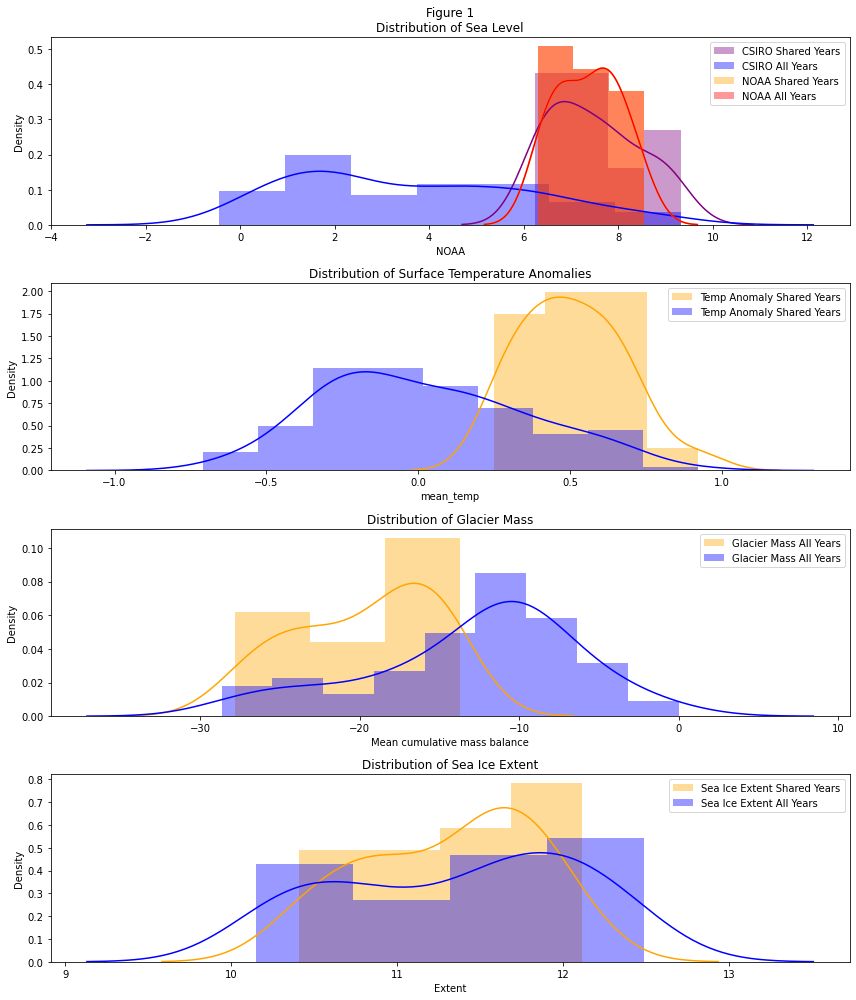

In [10]:
# Figure 1
fig, ax = plt.subplots(4, figsize=(12, 14))

# sea level
sns.distplot(df_all['CSIRO'], ax=ax[0], color='purple', label='CSIRO Shared Years').set(title='Figure 1\nDistribution of Sea Level')
sns.distplot(df_sl['CSIRO'], ax=ax[0], color='blue', label='CSIRO All Years')
sns.distplot(df_all['NOAA'], ax=ax[0], color='orange', label='NOAA Shared Years')
sns.distplot(df_sl['NOAA'], ax=ax[0], color='red', label='NOAA All Years')
ax[0].legend()
# # surface temperature
sns.distplot(df_all['Temp Anomaly'], ax=ax[1], color='orange', label='Temp Anomaly Shared Years').set(title='Distribution of Surface Temperature Anomalies')
sns.distplot(df_st['mean_temp'], ax=ax[1], color='blue', label='Temp Anomaly Shared Years')
ax[1].legend()
# glacier mass balance
sns.distplot(df_all['Glacier Mass'], ax=ax[2], color='orange', label='Glacier Mass All Years').set(title='Distribution of Glacier Mass')
sns.distplot(df_gm['Mean cumulative mass balance'], ax=ax[2], color='blue', label='Glacier Mass All Years')
ax[2].legend()
# sea ice extent
sns.distplot(df_all['Extent'], ax=ax[3], color='orange', label='Sea Ice Extent Shared Years').set(title='Distribution of Sea Ice Extent')
sns.distplot(df_sie_yearly['Extent'], ax=ax[3], color='blue', label='Sea Ice Extent All Years')
ax[3].legend()


# Plot
fig.tight_layout()

### Figure 1:
These graphs above show that the distributions of these variables are normally distributed, with nothing particularly out of the ordinary. The y-axis on these graphs shows approximately how many of the observations have a given x-value, and the x-value is the measurement itself.

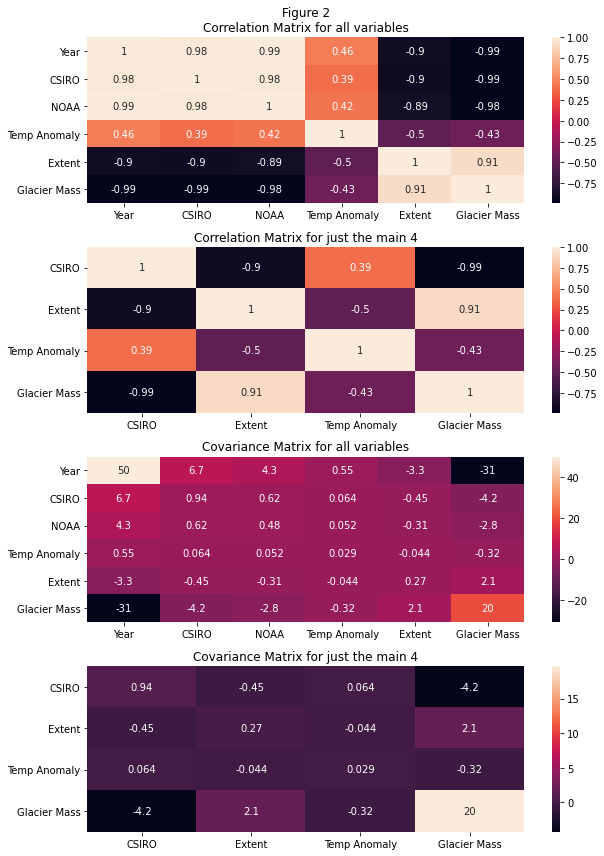

In [11]:
# Figure 2: Correlation matrix and Covariance Matrix for df_all
fig, ax = plt.subplots(4, figsize=(9, 12))

# Correlation
df_4_cols = df_all[['CSIRO', 'Extent', 'Temp Anomaly', 'Glacier Mass']]
sns.heatmap(df_all.corr(), annot=True, ax=ax[0]).set(title='Figure 2\nCorrelation Matrix for all variables')
sns.heatmap(df_4_cols.corr(), annot=True, ax=ax[1]).set(title='Correlation Matrix for just the main 4')

# Covariance
sns.heatmap(df_all.cov(), annot=True, ax=ax[2]).set(title='Covariance Matrix for all variables')
sns.heatmap(df_4_cols.cov(), annot=True, ax=ax[3]).set(title='Covariance Matrix for just the main 4')

fig.tight_layout()

### Figure 2: 

a. Correlation matrix of the final dataset

b. Covariance matrix of the final dataset

c. Correlation matrix of the final dataset

d. Covariance of the final dataset

These figures are correlation and covariance matrices, showing the relationships between each of the variables we usedi n our final dataset. Of note: glacier mass and sea level (CSIRO) have a strong negative relationship, with an increase in one resulting in a decrease in the other. As expected, time and glacier mass also have a strong negative relationship, since glaciers have been melting. Glacier ice and sea ice extent also have a strong positive relationship, which won't be in our analysis but is interesting to note.

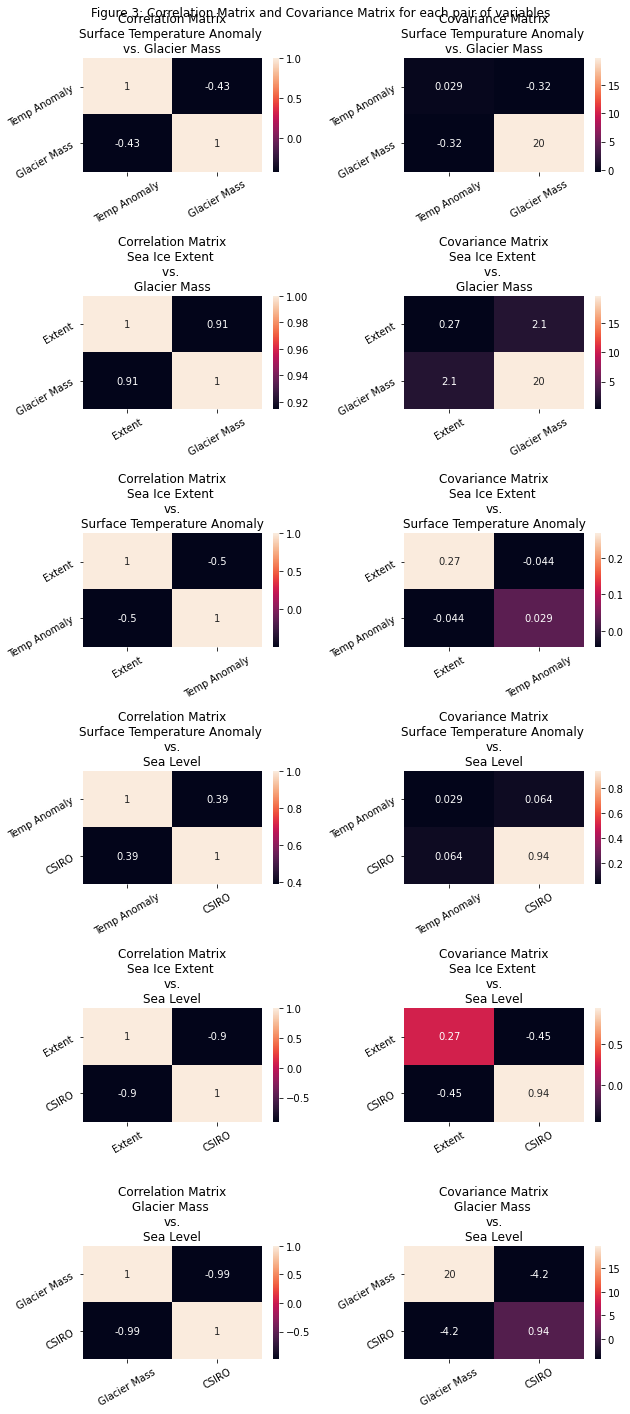

In [12]:
# Figure 3: Correlation matrix and Covariance Matrix for each pair of variables: by year (shared years only)
fig, ax = plt.subplots(6, 2, figsize=(9, 20))
fig.suptitle('Figure 3: Correlation Matrix and Covariance Matrix for each pair of variables')

## 1: Surface Temp + Glacier Mass
# a. Correlation matrix 
corr_st_gm = df_all[['Temp Anomaly', 'Glacier Mass']].corr()
# b. Covariance matrix
cov_st_gm = df_all[['Temp Anomaly', 'Glacier Mass']].cov()

# Plot
sns.heatmap(corr_st_gm, annot=True, ax=ax[0, 0]).set(title='Correlation Matrix\nSurface Temperature Anomaly \nvs. Glacier Mass')
sns.heatmap(cov_st_gm, annot=True, ax=ax[0, 1]).set(title='Covariance Matrix\nSurface Tempurature Anomaly \nvs. Glacier Mass')

## 2: Sea Ice Extent + Glacier Mass
# a. Correlation matrix
corr_sie_gm = df_all[['Extent', 'Glacier Mass']].corr()
# b. Covariance matrix
cov_sie_gm = df_all[['Extent', 'Glacier Mass']].cov()

# Plot
sns.heatmap(corr_sie_gm, annot=True, ax=ax[1, 0]).set(title='Correlation Matrix\nSea Ice Extent \nvs. \nGlacier Mass')
sns.heatmap(cov_sie_gm, annot=True, ax=ax[1, 1]).set(title='Covariance Matrix\nSea Ice Extent \nvs. \nGlacier Mass')

## 3: Sea Ice Extent + Surface Temp
# a. Correlation matrix
corr_sie_st = df_all[['Extent', 'Temp Anomaly']].corr()
# b. Covariance matrix
cov_sie_st = df_all[['Extent', 'Temp Anomaly']].cov()

# Plot
sns.heatmap(corr_sie_st, annot=True, ax=ax[2, 0]).set(title='Correlation Matrix\nSea Ice Extent \nvs.\nSurface Temperature Anomaly')
sns.heatmap(cov_sie_st, annot=True, ax=ax[2, 1]).set(title='Covariance Matrix\nSea Ice Extent \nvs.\nSurface Temperature Anomaly')

## 4: Surface Temp + Sea Level 
# a. Correlation matrix
corr_st_sl = df_all[['Temp Anomaly', 'CSIRO']].corr()

# b. Covariance matrix
cov_st_sl = df_all[['Temp Anomaly', 'CSIRO']].cov()

# Plot
sns.heatmap(corr_st_sl, annot=True, ax=ax[3, 0]).set(title='Correlation Matrix\nSurface Temperature Anomaly \nvs.\nSea Level')
sns.heatmap(cov_st_sl, annot=True, ax=ax[3, 1]).set(title='Covariance Matrix\nSurface Temperature Anomaly \nvs.\nSea Level')

## 5: Sea Ice Extent + Sea Level
# a. Correlation matrix
corr_sie_sl = df_all[['Extent', 'CSIRO']].corr()

# b. Covariance matrix
cov_sie_sl = df_all[['Extent', 'CSIRO']].cov()

# Plot
sns.heatmap(corr_sie_sl, annot=True, ax=ax[4, 0]).set(title='Correlation Matrix\nSea Ice Extent \nvs.\nSea Level')
sns.heatmap(cov_sie_sl, annot=True, ax=ax[4, 1]).set(title='Covariance Matrix\nSea Ice Extent \nvs.\nSea Level')

## 6: Glacier Mass + Sea Level
# a. Correlation matrix
corr_gm_sl = df_all[['Glacier Mass', 'CSIRO']].corr()

# b. Covariance matrix
cov_gm_sl = df_all[['Glacier Mass', 'CSIRO']].cov()

# Plot
sns.heatmap(corr_gm_sl, annot=True, ax=ax[5, 0]).set(title='Correlation Matrix\nGlacier Mass \nvs.\nSea Level')
sns.heatmap(cov_gm_sl, annot=True, ax=ax[5, 1]).set(title='Covariance Matrix\nGlacier Mass \nvs.\nSea Level')

# tick layout
for i in range(6):
    for j in range(2):
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(),rotation = 30)
        ax[i, j].set_yticklabels(ax[i, j].get_yticklabels(),rotation = 30)

fig.tight_layout()

### Figure 3:

a. Surface Temp Anomaly vs. Glacier Mass Balance

b. Glacier Mass Balance vs. Sea Ice Extent

c. Sea Ice Extent vs. Surface Temp Anomaly

d. Sea Level vs. Surface Temp Anomaly

e. Sea Level vs. Sea Ice Extent

f. Sea Level vs. Glacier Mass Balance

Figure 3 is similar to Figure 2, except split up to more clearly show the relationships between individual variables. As mentioned before, glacier mass and sea level have an almost 1:1 negative correlation, which we expect.

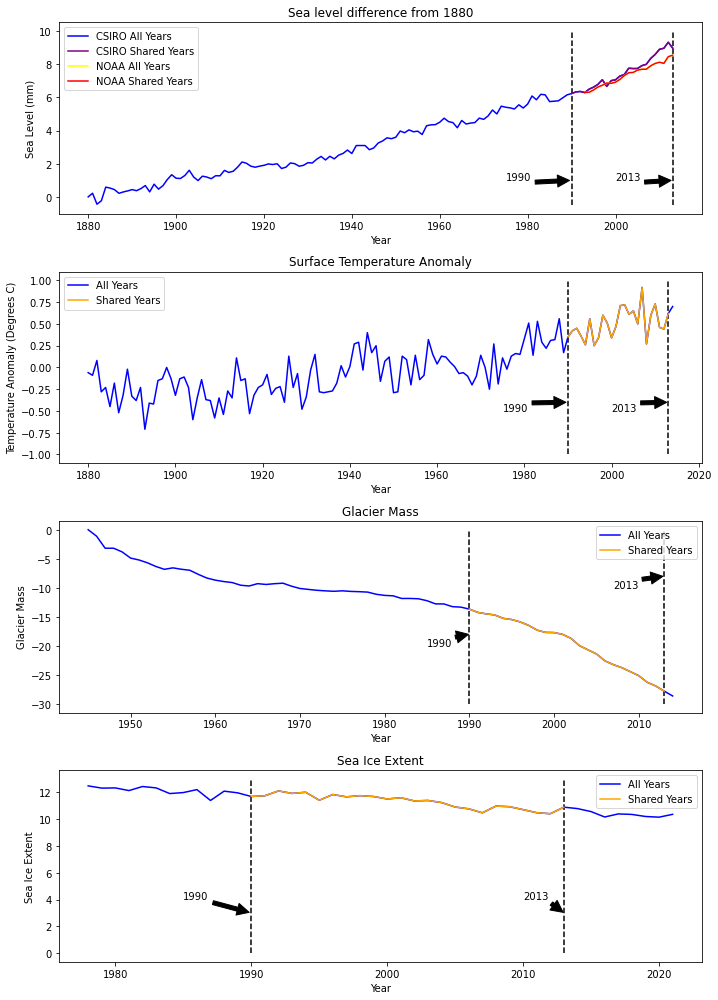

In [13]:
# Figure 4: Time Series
fig, ax = plt.subplots(4, 1, figsize=(10, 14))

# 1. Sea Level
X = df_all['Year']
X_full = df_sl['Year']
Y_c = df_all['CSIRO']
Y_n = df_all['NOAA']
Y_c_full = df_sl['CSIRO']
Y_n_full = df_sl['NOAA']

# 1. Sea Level
sns.lineplot(x=X_full, y=Y_c_full, ax=ax[0], label='CSIRO All Years', color='blue').set(xlabel='Year', ylabel='Sea Level (mm)', title='Sea level difference from 1880')
sns.lineplot(x=X, y=Y_c, ax=ax[0], label='CSIRO Shared Years', color='purple')
sns.lineplot(x=X_full, y=Y_n_full, ax=ax[0], label='NOAA All Years', color='yellow')
sns.lineplot(x=X, y=Y_n, ax=ax[0], label='NOAA Shared Years', color='red')
ax[0].vlines(x=[1990, 2013], ymin=-.5, ymax=10, color='black', linestyles='dashed', label='1990')
ax[0].annotate('1990', xy=(1990, 1), xytext=(1975, 1), arrowprops=dict(facecolor='black', shrink=0.05))
ax[0].annotate('2013', xy=(2013, 1), xytext=(2000, 1), arrowprops=dict(facecolor='black', shrink=0.05))

# 2. Surface Temperature
X_st_full = df_st['year']
Y_st_full = df_st['mean_temp']
Y_st = df_all['Temp Anomaly']
sns.lineplot(x=X_st_full, y=Y_st_full, ax=ax[1], label='All Years', color='blue').set(xlabel='Year', ylabel='Temperature Anomaly (Degrees C)', title='Surface Temperature Anomaly')
sns.lineplot(x=X, y=Y_st, ax=ax[1], label='Shared Years', color='orange')
ax[1].vlines(x=[1990, 2013], ymin=-1, ymax=1, color='black', linestyles='dashed')
ax[1].annotate('1990', xy=(1990, -.4), xytext=(1975, -.5), arrowprops=dict(facecolor='black', shrink=0.05))
ax[1].annotate('2013', xy=(2013, -.4), xytext=(2000, -.5), arrowprops=dict(facecolor='black', shrink=0.05))

# 3. Glacier Mass Balance
X_gm_full = df_gm['Year']
Y_gm_full = df_gm['Mean cumulative mass balance']
Y_gm = df_all['Glacier Mass']
sns.lineplot(x=X_gm_full, y=Y_gm_full, ax=ax[2], label='All Years', color='blue').set(xlabel='Year', ylabel='Glacier Mass', title='Glacier Mass')
sns.lineplot(x=X, y=Y_gm, ax=ax[2], label='Shared Years', color='orange')
ax[2].vlines(x=[1990, 2013], ymin=-30, ymax=0, color='black', linestyles='dashed')
ax[2].annotate('1990', xy=(1990, -18), xytext=(1985, -20), arrowprops=dict(facecolor='black', shrink=0.05))
ax[2].annotate('2013', xy=(2013, -8), xytext=(2007, -10), arrowprops=dict(facecolor='black', shrink=0.05))

# 4. Sea Ice Extent
X_sie_full = df_sie_yearly_f['Year']
Y_sie_full = df_sie_yearly_f['Extent']
Y_sie = df_all['Extent']
sns.lineplot(x=X_sie_full, y=Y_sie_full, ax=ax[3], label='All Years', color='blue').set(xlabel='Year', ylabel='Sea Ice Extent', title='Sea Ice Extent')
sns.lineplot(x=X, y=Y_sie, ax=ax[3], label='Shared Years', color='orange')
ax[3].vlines(x=[1990, 2013], ymin=0, ymax=13, color='black', linestyles='dashed')
ax[3].annotate('1990', xy=(1990, 3), xytext=(1985, 4), arrowprops=dict(facecolor='black', shrink=0.05))
ax[3].annotate('2013', xy=(2013, 3), xytext=(2010, 4), arrowprops=dict(facecolor='black', shrink=0.05))

fig.tight_layout()

### Figure 4: 

a. Sea Level CSIRO vs NOAA

b. Surface temp anomaly

c. Glacier Mass Balance

d. Sea Ice Extent

This series of graphs is a time-series showing changes in our variables over time. We also took care to show our "shared" dataset, which used only data in the time period available across all data sets. The x-axis for these graphs is years, showing available years for all datasets, while the y-axes for each graph is their respective measures.


## Analysis

We used a feature selection approach to analyze the data, by creating a set of models of increasing complexity to predict the sea level rise. We used the following models: 3 linear support vector models (SVMs) (one for each variable), 3 polynomial support vector models (SVM) that use pairs of variables, and 1 polynomial SVM using all 3 columns. The resulting models were compared to each other by their absolute error using a scatter plot to help visualization.

This is a simplistic version of PCA (primary component analysis) that is used to reduce the number of variables in a dataset, also called 'dimensionality reduction'. The resulting models allow for comparison of the underlying variables with respect to how important they are to the prediction of the sea level rise. 

In [14]:
# Model Training
## Linear SVM 1 var
# 1: Surface Temp

# 2: Glacier Mass

# 3: Sea Ice Extent


## Polynomial SVM 2 var
# 1: Surface Temp + Glacier Mass

# 2: Sea Ice Extent + Glacier Mass

# 3: Sea Ice Extent + Surface Temp



## Polynomial SVM 3 var
# 1. all 3

model_all = []



In [15]:
# Figure 4
# Scatter: X = # cols, Y = Accuracy

## Results

Our approach of feature selection leads us to an interesting choice of visualization. By using a scatter plot with x values representing the number of input variables, and y values representing their r^2 score, we can see that the models with more variables have (on average) a higher r^2 score. The highest r^2 score is that of the full model using surface temperature, sea ice extent, and glacier mass balance: 0.9733. Of the models that use 2 variables, we begin to see the quality of individual features with respect to the predictions. The two models that contain the glacier mass balance and another variable report r^2 values of 0.9731 and 0.9718 respectively for the surface temperature anomaly and sea ice extent datasets. However, the model that contains only the surface temperature anomaly and the sea ice index dataset reports a r^2 value of 0.8215. While not an awful result, it is significantly lower than the full model or either of its 2-variable counterparts. Finally, the 1 variable models carry this thought process further, with the model that contains only the surface temperature anomaly reporting the lowest r^2 value of 0.151. The model that contains only the sea ice extent data reports the familiar value of 0.817, similar to the prior mentioned 2-variable model, and the model that contains only the glacier mass balance data reports a r^2 value of 0.9717.


# Ethics & Privacy
The United States Environmental Protection Agency aims to preserve the environment by identifying and attempting to rectify environmental issues.  They believe that protecting our world is the responsibility of everyone and therefore want to raise awareness and spread education about these topics.  Since the data is public on their website, this grants us permission to access.  According to their data sources, the compiled data for glaciers was from various sources such as The World Glacier Monitoring Service and The U.S. Geological Survey Benchmark Glacier Program.  For sea level, the data was from Australia’s Commonwealth Scientific and Industrial Research Organization and the National Oceanic and Atmospheric Administration.  The data appears to be “based on measurements collected by satellites and tide gauges.”  No information gathered from the United States Environmental Protection Agency would be considered personal, since the data is about weather and oceans instead of people. 

The World Glacier Monitoring Service consists of a collection of standardized observations in regards to mass, volume and area of glaciers.  This statistical information serves to give insight into changes of atmospheric warming and the processes of potential climate change.  For scientific and educational purposes, the WGMS allows for an open exchange of data.  All data is considered to be public domain and made digitally available to all users.

The National Centers for Environmental Information, as a subset of the National Oceanic and Atmospheric, is the leading authority for environmental data which contains one of the largest archives of oceanic research in the world.  The Freedom of Information Act allows the right for any person to access federal agency records, unless otherwise protected.  This grants us permission to access their stored data.

The National Snow and Ice Data Center promotes a systematic approach to their accessible data.  While distributing their scientific research, they aim to also create tools for data access in an effort to inform and educate the public about the Earth’s cryosphere.  All data is accessible through the online catalog.

All these sources are also very likely to be a good-faith attempt at accurate information, since it’s sourced from the US government and impartial science data. 

Perhaps the most likely source of bias is from the researchers (ie. us). Whether consciously or unconsciously, we may have selected datasets that confirm our preconceived notions of what factors might influence sea level (confirmation bias). There isn’t much that we can do about confirmation bias other than to encourage readers to do their own due diligence and take all findings presented with a grain of salt.


## Conclusion & Discussion

## Conclusion
As we initially hypothesized, using all 3 input variables produces a more accurate model than any pair or individual variable. However, we also noted that the influence of even 1 input variable can drastically alter its accuracy as measured by its r^2 value. This is evident in 3 main ways: 1- The model that contains only the surface temperature anomaly has a the lowest r^2 value of the group, but this is likely due to it being recorded as the surface temperature 'anomaly' rather than the raw data. This leads us to believe the normalized slope caused significant reduction in accuracy. 2- The Glacier Mass Balance data is incredibly highly correlated with the sea level, as evidenced in the correlation matrices of figure 2. It is featured in all 3 of the highest-scoring models, and is therefore likely to be a contributing factor in the accuracy of the model. 3- The sea ice extent data alone scores an r^2 value of approximately 0.8, similar to the lower-scoring 2-variable model. As a result, we believe that sufficient correlation between the two datasets is likely to lead to a slightly lower r^2 value than the highest-correlated 1-variable model. 


## Discussion
Despite not being nearly as complex as more highly rigorous scientific models like [CMIP](https://www.wcrp-climate.org/wgcm-cmip), our approach of feature selection allows us to evaluate some of the more commonly cited variables that contribute to sea level rise by influencing the climate system. Modeling sea level rise in this fashion is a risky endevour for three main reasons, the first being that the data we have available pales in comparison to the data required to make long-term predictions. The snippet of years we have satellite data for is less than a century long, and lower-scale data is significantly less likely to be accurate at large scales. The second reason is the fact that only a small number of variables are used in the model, meaning we may have inadvertently left out important variables. Lastly, the complexity of climate model variables is massive in part due to thir dependence on one another, and thus any attempt to model sea level rise in this way is likely to include variables less useful than others, such as here with the surface temperature anomaly.